<h2>Teste A/B</h2>

<h2>Problema de Negócio:</h2>
A Urban Wear, uma grande loja virtual (eCommerce) localizada na Flórida, está avaliando uma mudança no design do seu site. O gerente da equipe de marketing propôs alterar a cor do botão "Adicionar ao carrinho" de laranja para verde, com o objetivo de aumentar a taxa de conversão dos visitantes em compradores.

A hipótese definida para este teste é:

<h3>"Mudar a cor do botão 'Adicionar ao carrinho' de laranja para verde aumentará a taxa de conversão."</h3>

Como cientista de dados de produto na Urban Wear, seu papel é planejar, executar e analisar um experimento A/B que teste o impacto dessa mudança.

<ul><li>A versão de controle (A) mantém o botão "Adicionar ao carrinho" na cor laranja, que é a versão atual.</li>

<li>A versão de teste (B) apresenta o botão na cor verde, como proposto pela equipe de marketing.</ul></li>

Sua missão é ajudar a equipe de produto da Urban Wear a decidir qual versão utilizar com base nos resultados do teste A/B.


![](Shoes.PNG)

<h2>processo e planejamento do teste</h2>
Após as reuniões realizadas com a equipe de produto e ciência de dados para definição do processo e planejamento do teste A/B, foram estabelecidos os principais parâmetros do experimento. Considerando uma taxa de conversão atual de 10%, estimou-se a necessidade de uma amostra total de 20.000 visitantes para detectar um aumento mínimo de 5% relativo na conversão com 95% de confiança e 80% de poder estatístico. A unidade de randomização adotada foi o visitante individual: o grupo de controle (A) receberá 10.000 visitantes, enquanto o grupo de teste (B) também contará com 10.000 visitantes. A duração prevista do experimento é de 10 dias, com distribuição balanceada dos usuários ao longo desse período.

<h2>Unidade de Randomização ou Unidade de Aleatorização</h2>
A unidade de randomização é o nível em que os participantes ou observações são aleatoriamente atribuídos aos grupos de um experimento (ex: controle(A) e tratamento(B)).

![](Randomization.PNG)

In [51]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew,chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

<h2>Hipótese nula (H₀):</h2>
<ul><li>A taxa de conversão é a mesma para os dois grupos(A-B).
Ou seja, a mudança de cor não fez diferença significativa.</li></ul>
<h2>Hipótese alternativa (H₁):</h2>
<ul><li>A taxa de conversão é diferente entre os dois grupos(A-B).
Ou seja, a cor do botão teve um efeito significativo.</li></ul>
<h2>Poder ou Stat Power</h2>
<ul><li>O poder do teste é a probabilidade de detectar um efeito real, ou seja, de rejeitar corretamente a hipótese nula (H₀) quando ela é falsa. </li></ul>

<h2>A diferença é significativa?</h2>
Para determinar se a diferença nas taxas de conversão entre a Variante A e a Variante B é significativa, é necessário realizar um teste estatístico, como o teste qui-quadrado (chi-square) ou o teste t, dependendo da distribuição dos dados. Isso envolve comparar as taxas de conversão e calcular o p-valor para verificar se a diferença observada é estatisticamente significativa.

<h2>Etapas para Planejar e Analisar o Experimento:</h2>
<ul><li>Problema de Negócio:</li>
<li>Definir as Hipóteses:
Seja claro, específico e compreenda bem o contexto do negócio.</li>
<li>Tamanho de amostra</li>
<li>Unidade de Randomização:
Defina como os visitantes serão distribuídos entre as variantes (ex: por visitante, por sessão, etc.).</li>
<li>Coletar os Dados</li>
<li>Calcular as Taxas de Conversão</li>
<li>Executar o Teste Estatístico</li>
<li>Interpretar os Resultados:

Se o p-valor for menor que o nível de significância definido (por exemplo, 0,05), a diferença é considerada estatisticamente significativa.</li></ul>


<h2>principais parâmetros</h2>

Nível de Confiança= 95%   # a certeza que temos de que os resultados refletem a realidade e não são fruto do acaso.
Nível de Significância ou alfa=0.05
Poder= 80%  # Probabilidade de detectar um efeito real (rejeitar H₀ quando ela é falsa).
MDE = 10%

<h2>Métrica Principal (Primary Metric) e Métricas Secundárias</h2>
<ul><li>Taxa de Conversão (Conversion Rate)</li></ul>
<ul><li>CTR (Click-Through Rate) do botão</li></ul>
CTR= cliques / N impressoes 

In [2]:
# Carregando a base de dado do teste
df= pd.read_csv("ab_data test.csv")
df.head(10)

,User_ID,Variant,Clicks,Conversions
0,2721,A,3,0
1,2241,A,2,0
2,9808,A,16,0
3,3804,A,3,0
4,4391,A,9,0
5,5882,A,11,0
6,5489,A,13,0
7,2334,A,12,0
8,8671,A,19,0
9,2440,A,10,0


In [3]:
#Verificando o numero de variante
df.Variant.unique()

array(['A', 'B'], dtype=object)

In [11]:
#Estat desc
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
User_ID,20000.000000,10000.500000,5773.647028,1.000000,5000.750000,10000.500000,15000.250000,20000.000000
Clicks,20000.000000,9.513450,5.768603,0.000000,5.000000,10.000000,15.000000,19.000000
Conversions,20000.000000,0.034600,0.182769,0.000000,0.000000,0.000000,0.000000,1.000000


In [4]:
# o tamanho da base 
df.shape

(20000, 4)

In [5]:
# O numero de visitantes por variante
df["Variant"].value_counts()

A    10000
B    10000
Name: Variant, dtype: int64

In [24]:
# O numero de clicks por variante A-B
df.groupby('Variant').Clicks.agg(['sum']).style.background_gradient(cmap="Blues")

,sum
Variant,
A,95172
B,95097


In [25]:
#Numero de conversao por variante
df.groupby('Variant').Conversions.agg(['sum']).style.background_gradient(cmap="Blues")

,sum
Variant,
A,270
B,422


<h2>Pooled Estimates(estimativas combinadas)por cliques</h2>
No contexto de testes A/B, o pooled estimate da taxa de conversão é usado para calcular a variância comum dos dois grupos sob a hipótese nula (H₀), que diz que ambos os grupos têm a mesma taxa de conversão.

In [9]:
#p= (Xcon + Xexp) / (Ncon + Nexp)
#Pooled estimate por cliques

p= (95172+95097) / 20000
print (p)

9.51345


In [48]:
#Estimativas combinadas de A
PA=(270/10000) 
print("Taxas de conversão de Variante A:",PA)

#
#Estimativas combinadas de B
PB=(422/10000) 
print("Taxas de conversão de Variante B:",PB)

#Pooled estimate da conversão:
Ppooled=(270+422) / 20000
print("conversão total combinada dos dois grupos:",Ppooled)


Taxas de conversão de Variante A: 0.027
Taxas de conversão de Variante B: 0.0422
conversão total combinada dos dois grupos: 0.0346


In [8]:
# cliques
# Exemplo: contar visitantes únicos por grupo
total_visitors = df.groupby('Variant')['User_ID'].nunique()

# Contar visitantes únicos que clicaram pelo menos uma vez
clickers = df[df['Clicks'] == 1].groupby('Variant')['User_ID'].nunique()

# Calcular p para cada grupo
conversion_rate = clickers / total_visitors

print(conversion_rate)


Variant
A    0.0447
B    0.0464
Name: User_ID, dtype: float64


<h2>Pooled variance(ou variância combinada)</h2>

<h2>Visualização de dados</h2>

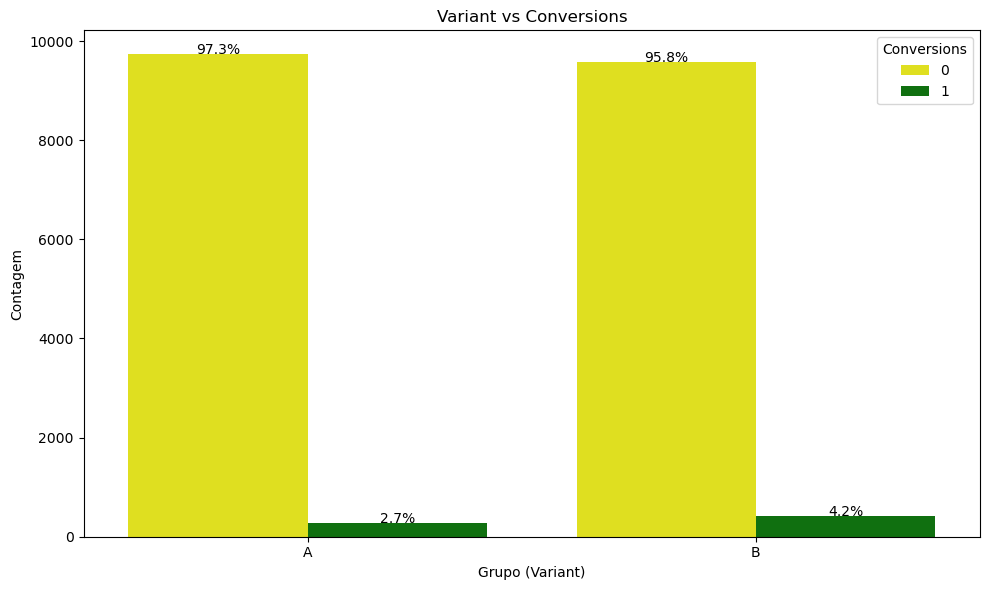

In [16]:
# Paleta de cores
palette = {0: 'yellow', 1: 'green'}

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de barras com contagem
ax = sns.countplot(x='Variant', data=df, palette=palette, hue='Conversions')

# Título do gráfico
plt.title('Variant vs Conversions')

# Calcular totais por grupo (para percentual)
total_per_variant = df.groupby('Variant').size()

# Adicionar anotações com percentual em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    variant = p.get_x() + p.get_width() / 2.0
    # Obtem o grupo correspondente (0 ou 1)
    variant_label = p.get_x() + p.get_width() / 2.0
    variant_group = p.get_x()
    # Determinar qual grupo (controle ou teste) pela posição
    variant_index = int(round(p.get_x() + p.get_width() / 2.0))
    
    # Obter total de observações no grupo atual
    total = total_per_variant[variant_index]
    
    # Calcular percentual
    percent = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.1f}%'.format(percent),
            ha="center")

plt.ylabel("Contagem")
plt.xlabel("Grupo (Variant)")
plt.legend(title="Conversions", loc="upper right")
plt.tight_layout()
plt.show()


<h2>Standard Erroe,Test Stat e Z-score</h2>

In [49]:
#Calcular o SE para variante A e variante B
varianteA_se = np.sqrt(PA * (1 - PA) / 10000).round(6)

#SE para variante B
varianteB_se = np.sqrt(PB * (1 - PB) / 10000).round(5)

print("valor do erro padrão (SE - Standard Error) da proporção de conversão no variante A:",varianteA_se)
print("valor do erro padrão (SE - Standard Error) da proporção de conversão no variante B:",varianteB_se)

valor do erro padrão (SE - Standard Error) da proporção de conversão no variante A: 0.001621
valor do erro padrão (SE - Standard Error) da proporção de conversão no variante B: 0.00201


In [50]:
SE_ab= np.sqrt(varianteA_se + varianteB_se).round(4)
print("SE da diferença entre dois grupos (controle e experimento)",SE_ab)

SE da diferença entre dois grupos (controle e experimento) 0.0603


In [64]:
#( CRB - CRA ) / SEdifference
#Z_score=(PB-PA)/SE_ab
#print(Z_score)

In [65]:
# Calcular as diferenças absolutas e relativas
absolute_diff = PB - PA
relative_diff = absolute_diff / PA

In [80]:
pooled_se = np.sqrt(varianteA_se**2 + varianteB_se**2)
z_score = absolute_diff / pooled_se
print(z_score)

5.886460403795122


<h2>P-values</h2>

In [78]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_score))).round(3)
z_crítico  = stats.norm.ppf(1 - alfa/2)
if p_value < alfa and PA < PB and z_score > z_crítico: 
    print("A diferença é considerada estatisticamente significativa.Rejeita a hipótese nula (H₀)")
else:
    print("Manter hipótese nula (H₀)")

a diferença é considerada estatisticamente significativa.Rejeita a hipótese nula (H₀)


<h2>Tomar a decisão sobre o lançamento do variante B</h2>
A análise estatística indicou que a Variante B teve desempenho superior em relação à Variante A, com um valor de p abaixo do nível de significância de 5%, permitindo a rejeição da hipótese nula.

Diante disso, recomenda-se prosseguir com a decisão sobre o lançamento da Variante B.